# Machine Learning Programming Exercise 8: Recommender Systems

In [1]:
#import package(s)
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio 
import scipy.stats
import scipy as sp

## 2 Recommender Systems
In this part of the exercise, the collaborative filtering learning algorithm is applied to a dataset of movie ratings from [GroupLens Research](https://grouplens.org/datasets/movielens/). This dataset consists of ratings on a scale of 1 to 5. The dataset has $n_u$ = 943 users and $n_m$ = 1682 movies.

The function cofiCostFunc will compute the collaborative filtering objective function and gradient. Afterwards, an optimizing algorithm will learn the parameters for collaborative filtering.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    
   One important application of machine learning is building better recommender systems. Improving the performance of a recommender system can have a substantial and immediate impact (increased revenue, better service, etc.) of many companies.
   
   There are two common learning algorithms used in recommender systems: content based and collaborative filtering:
   * Content based learning algorithm uses the content of the products/servcies as features to make predictions for a user's ratings. For movie recommendations, the content of the movies could be how much action/romance/etc. is in the movie. Yet, it may be difficult to get these features if they even exist. 
   * Collaborative filtering learning algorithm  can start to learn for itself what features to use. It uses a large set of users' ratings collaboratively to learn better ratings (features) for everyone. For movie recommendations, many users rating some subset of movies is helping the algorithm learn better features to make better movie predictions for everyone else. 
   
</div>

### 2.1 Movie ratings dataset
The dataset ex8 movies.mat contains the variables $Y$ and $R$. The matrix $Y$ (a num movies$\times$num users matrix) stores the ratings $y^{(i,j)}$ (from 1 to 5). The matrix $R$ is an binary-valued indicator matrix, where $R(i,j)=1$ if user $j$ gave a rating to movie $i$, and $R(i,j)=0$ otherwise. The objective of collaborative filtering is to predict movie ratings for the movies that users have not yet rated, that is, the entries with $R(i,j)=0$. This will allow us to recommend the movies with the highest predicted ratings to the user. 

To understand the matrix $Y$, compute the average movie rating for the first movie (Toy Story) and output the average rating to the screen.

This exercise uses the matrix $X$ and $Theta$:

$X= \begin{bmatrix}
       -(x^{(1)})^T- \\
       -(x^{(2)})^T- \\
       \vdots \\
       -(x^{(n_m)})^T-
       \end{bmatrix}, \quad Theta = \begin{bmatrix}
       -(\theta^{(1)})^T- \\
       -(\theta^{(2)})^T- \\
       \vdots \\
       -(\theta^{(n_u)})^T-
       \end{bmatrix}$
       
The $i$-th row of $X$ corresponds to the feature vector $x^{(i)}$ for the $i$-th movie, and the $j$-th row of $Theta$ corresponds to one parameter vector $\theta^{(j)}$ for the $j$-th user. Both $x^{(i)}$ and $\theta^{(j)}$ are $n$-dimensional vectors. For the purposes of this exercise, $n=100$. Therefore, $x^{(i)} \in \mathbb{R}^{100}$ and $\theta^{(j)} \in \mathbb{R}^{100}$. Correspondingly, $X$ is a $n_m \times 100$ matrix and $Theta$ is a $n_u \times 100$ matrix.

Loading movie ratings dataset.
Average rating for movie 1 (Toy Story): 4.52 / 5


Text(0.5, 0, 'Users')

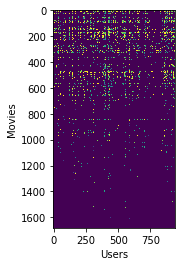

In [2]:
# =============== Part 1: Loading movie ratings dataset ================
#  You will start by loading the movie ratings dataset to understand the
#  structure of the data.

print('Loading movie ratings dataset.')

#Load data
movie_data = sio.loadmat('ex8_movies.mat')

#Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 
#943 users
#R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#rating to movie i
Y = movie_data['Y']
R = movie_data['R']

#From the matrix, we can compute statistics like average rating.
print('Average rating for movie 1 (Toy Story): %.2f / 5'% np.mean(Y[0,R[0,:]]))

#We can "visualize" the ratings matrix by plotting it with imagesc
plt.figure()
#Display the original image 
plt.imshow(Y)
plt.ylabel('Movies')
plt.xlabel('Users')

Above is a visual of the movie ratings matrix $Y$.

### 2.2 Collaborative ﬁltering learning algorithm
For the collaborative filtering learning algorithm, the cost function is first implemented without regularization. 

The collaborative filtering algorithm in the setting of movie recommendations considers a set of $n$-dimensional parameter vectors $x^{(1)}, \dots, x^{(n_m)}$ and $\theta^{(1)}, \dots, \theta^{(n_u)}$, where the model predicts the rating for movie $i$ by user $j$ as $y^{(i,j)} = (\theta^{(j)})^T x^{(i)}$. Given a dataset that consists of a set of ratings produced by some users on some movies, our wish is to learn the parameter vectors $x^{(1)}, \dots, x^{(n_m)}$,$\theta^{(1)}, \dots, \theta^{(n_u)}$ that produce the best fit (minimizes the squared error). 

Use the function cofiCostFunc to compute the cost function and gradient for collaborative filtering. Note that the parameters to the function (i.e., the values that we are trying to learn) are $X$ and $Theta$. The cost function has been set up to unroll the parameters into a single vector $params$. The same vector unrolling method was previously used in the neural networks programming exercise.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    
   Steps for collaborative filtering learning algorithm:
   1. Initialize $x^{(1)}, \dots, x^{(n_m)}$ and $\theta^{(1)}, \dots, \theta^{(n_u)}$ to small random values
   2. Minimize $J(x^{(1)}, \dots, x^{(n_m)}$ and $\theta^{(1)}, \dots, \theta^{(n_u)})$ using gradient descent or an advanced optimization algorithm for every $j = 1, \dots, n_u , i = 1, \dots, n_m: \\$ 
   $\begin{align*} x_k^{(i)} := x_k^{(i)} - \alpha \sum_{j:r(i,j)=1} ( (\theta^{(j)})^T x^{(i)} - y^{(i,j)})\theta_k^{(j)} + \lambda x_k^{(i)}   \\   \theta_k^{(j)} := \theta_k^{(j)} - \alpha \sum_{i:r(i,j)=1} ( (\theta^{(j)})^T x^{(i)} - y^{(i,j)})x_k^{(i)} + \lambda \theta_k^{(j)} \end{align*}$
   
   3. For a user with parameter $\theta$ and a movie with (learned) features $x$, predict a star rating of $\theta^T x.$   
</div>

#### 2.2.1 Collaborative ﬁltering cost function
The collaborative filtering cost function (without regularization) is given by $\begin{align*} J(x^{(1)}, \dots, x^{(n_m)},\theta^{(1)}, \dots, \theta^{(n_u)}) = \frac{1}{2} \sum_{(i,j):r(i,j)=1} ( (\theta^{(j)})^T x^{(i)} - y^{(i,j)})^2 .\end{align*}$

For the code, return this cost in the variable $J$. Note the cost should be accumulated for user $j$ and movie $i$ only if $R(i,j)=1$. For the cost function, the expected output is 22.22.

In [3]:
#define function for exercise(s)
def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda):
#COFICOSTFUNC Collaborative filtering cost function
#   J = COFICOSTFUNC(params, Y, R, num_users, num_movies, ...
#   num_features, lambda) returns the cost for the
#   collaborative filtering problem.
    
    #Unfold the U and W matrices from params
    X = np.reshape(params[0:num_movies*num_features], (num_movies, num_features), order='F')
    Theta = np.reshape(params[num_movies*num_features:], (num_users, num_features), order='F')

    J = np.sum(np.square(np.multiply(np.dot(X,Theta.T)-Y,R)))/2
    reg = (Lambda/2)*(np.sum(np.square(X)) + np.sum(np.square(Theta)))
    
    return J + reg
    
# ============ Part 2: Collaborative Filtering Cost Function ===========
#  You will now implement the cost function for collaborative filtering.
#  To help you debug your cost function, we have included set of weights
#  that we trained on that. Specifically, you should complete the code in 
#  cofiCostFunc.m to return J.

#Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
movie_params = sio.loadmat('ex8_movieParams.mat')
X = movie_params['X']
Theta = movie_params['Theta']

#Reduce the data set size so that this runs faster
num_users = 4 
num_movies = 5 
num_features = 3

X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[0:num_movies, 0:num_users]
R = R[0:num_movies, 0:num_users]

#Evaluate cost function
params = np.vstack((X.T.reshape((-1,1)),Theta.T.reshape((-1,1)))) 
J = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, 0)

print('Cost at loaded parameters: %f ' % J)
print('(this value should be about 22.22)')

Cost at loaded parameters: 22.224604 
(this value should be about 22.22)


#### 2.2.2 Collaborative ﬁltering gradient
Implement the gradient (without regularization). Complete the code in cofiCostFunc to return the variables X_grad and Theta_grad. Note that X_grad should be a matrix of the same size as $X$ and similarly, Theta_grad is a matrix of the same size as $Theta$. The gradients of the cost function is given by: $\begin{align*} \frac{\partial J}{\partial x_k^{(i)}} = \sum_{j:r(i,j)=1} ( (\theta^{(j)})^T x^{(i)} - y^{(i,j)})\theta_k^{(j)}  \\  \frac{\partial J}{\partial \theta_k^{(j)} } = \sum_{i:r(i,j)=1} ( (\theta^{(j)})^T x^{(i)} - y^{(i,j)})x_k^{(i)}. \end{align*}$

Note that the function returns the gradient for both sets of variables by unrolling them into a single vector.  Run a gradient check (checkCostFunction) to numerically check the implementation of the gradients. This is similar to the numerical check used in the neural networks exercise.. If the implementation is correct, then the analytical and numerical gradients match up closely.

In [4]:
#define function for exercise(s)
def computeNumericalGradient(params, Y, R, num_users, num_movies, num_features, Lambda):
#COMPUTENUMERICALGRADIENT Computes the gradient using "finite differences"
#and gives us a numerical estimate of the gradient.
#   numgrad = COMPUTENUMERICALGRADIENT(J, theta) computes the numerical
#   gradient of the function J around theta. Calling y = J(theta) should
#   return the function value at theta.

# Notes: The following code implements numerical gradient checking, and 
#        returns the numerical gradient.It sets numgrad(i) to (a numerical 
#        approximation of) the partial derivative of J with respect to the 
#        i-th input argument, evaluated at theta. (i.e., numgrad(i) should 
#        be the (approximately) the partial derivative of J with respect 
#        to theta(i).)
    numgrad = np.zeros((params.shape[0],params.shape[1]))
    perturb = np.zeros((params.shape[0],params.shape[1]))
    e = 1e-4
    for p in range(0,params.size):
        #Set perturbation vector
        #change one of elements of the vector to be the value of e
        perturb[p] = e
        #calculate the cost function at the perturb values for theta
        loss1 = cofiCostFunc(params - perturb, Y, R, num_users, num_movies, 
                             num_features, Lambda)
        loss2 = cofiCostFunc(params + perturb, Y, R, num_users, num_movies, 
                             num_features, Lambda)
        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / float(2*e)
        #change the element back to zero
        perturb[p] = 0
        
    return numgrad

def cofiGradient(params, Y, R, num_users, num_movies, num_features, Lambda):
#COFIGRADIENT Collaborative filtering gradient function
#   grad = COFIGRADIENT(params, Y, R, num_users, num_movies, ...
#   num_features, lambda) returns the gradient for the
#   collaborative filtering problem.    
    
    # Unfold the U and W matrices from params
    X = np.reshape(params[0:num_movies*num_features], (num_movies, num_features), order='F')
    Theta = np.reshape(params[num_movies*num_features:], (num_users, num_features), order='F')
    
    X_grad = np.dot(np.multiply(np.dot(X,Theta.T)-Y,R), Theta) + (Lambda * X)
    Theta_grad = np.dot((np.multiply(np.dot(X,Theta.T)-Y,R)).T, X) + (Lambda * Theta)
    
    grad = np.vstack((X_grad.T.reshape((-1,1)),Theta_grad.T.reshape((-1,1))))
    #use for method = TNC:
    #return grad
    
    #change G.shape from 2d to 1d for bgfs, cg, etc:
    return np.ravel(grad)
    
    
def checkCostFunction(Lambda):
#CHECKCOSTFUNCTION Creates a collaborative filering problem 
#to check your cost function and gradients
#   CHECKCOSTFUNCTION(lambda) Creates a collaborative filering problem 
#   to check your cost function and gradients, it will output the 
#   analytical gradients produced by your code and the numerical gradients 
#   (computed using computeNumericalGradient). These two gradient 
#   computations should result in very similar values.
    
    #Create small problem
    X_t = np.random.rand(4, 3)
    Theta_t = np.random.rand(5,3)
    
    #Zap out most entries
    Y = np.dot(X_t, Theta_t.T)
    Y[np.random.rand(Y.shape[0], Y.shape[1]) > 0.5] = 0
    R = (Y>0)*1
    
    #Run Gradient Checking
    X = np.random.randn(X_t.shape[0], X_t.shape[1])
    Theta = np.random.randn(Theta_t.shape[0], Theta_t.shape[1])
    num_users = Y.shape[1]
    num_movies = Y.shape[0]
    num_features = Theta_t.shape[1]
    params = np.vstack((X.T.reshape((-1,1)),Theta.T.reshape((-1,1)))) 
    
    numgrad = computeNumericalGradient(params, Y, R, num_users, num_movies, 
                                       num_features, Lambda)
    
    grad = cofiGradient(params, Y, R, num_users, num_movies, num_features, Lambda)
    
    #Visually examine the two gradient computations.  The two columns
    #you get should be very similar. 
    print(np.column_stack((numgrad, grad)))
    print('\nThe above two columns you get should be very similar.') 
    print('[Left-Your Numerical Gradient   Right-Analytical Gradient]')

    #Evaluate the norm of the difference between two solutions.  
    #If you have a correct implementation, and assuming you used EPSILON = 0.0001 
    #in computeNumericalGradient.m, then diff below should be less than 1e-9
    diff = np.linalg.norm(numgrad-grad)/(np.linalg.norm(numgrad+grad))
    #numpy.linalg.norm is the euclidean norm or 2-norm
    
    print('\nIf your cost function implementation is correct, then') 
    print('the relative difference will be small (less than 1e-9).') 
    print('Relative Difference:', diff)

# ============== Part 3: Collaborative Filtering Gradient ==============
#  Once your cost function matches up with ours, you should now implement 
#  the collaborative filtering gradient function. Specifically, you should 
#  complete the code in cofiCostFunc.m to return the grad argument.
  
print('Checking Gradients (without regularization) ... ')

#Check gradients by running checkNNGradients
checkCostFunction(0)

Checking Gradients (without regularization) ... 
[[-5.98391181e+00 -5.98391181e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 4.41710118e-01  4.41710118e-01]
 [-2.79263368e+00 -2.79263368e+00]
 [ 8.65238975e+00  8.65238975e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.04240082e+00 -1.04240082e+00]
 [-1.61347590e+00 -1.61347590e+00]
 [-1.82913851e+00 -1.82913851e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 5.78903463e-01  5.78903463e-01]
 [-1.00254156e+00 -1.00254156e+00]
 [ 1.99934051e+00  1.99934051e+00]
 [ 8.11395966e+00  8.11395966e+00]
 [ 4.25774720e+00  4.25774720e+00]
 [ 1.18516448e+01  1.18516448e+01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.58798064e+00  1.58798064e+00]
 [ 2.29968758e-02  2.29968758e-02]
 [ 8.38218093e-01  8.38218093e-01]
 [ 1.63463099e+00  1.63463099e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-2.21972878e+00 -2.21972878e+00]
 [-3.31117940e-01 -3.31117940e-01]
 [-9.52577173e-04 -9.52577177e-04]
 [ 1.29540799e+00  1.29540799e+00]
 [ 0.00000000e+00  0.00000000e+00]]

The 

#### 2.2.3 Regularized cost function
The cost function for collaborative filtering with regularization is given by
$\begin{align*} J(x^{(1)}, \dots, x^{(n_m)},\theta^{(1)}, \dots, \theta^{(n_u)}) = \frac{1}{2} \sum_{(i,j):r(i,j)=1} ( (\theta^{(j)})^T x^{(i)} - y^{(i,j)})^2 + \left (\frac{\lambda}{2} \sum_{j=1}^{n_u}\sum_{k=1}^n (\theta_k^{(j)})^2 \right)  + \left (\frac{\lambda}{2} \sum_{i=1}^{n_m}\sum_{k=1}^n (x_k^{(i)})^2 \right). \end{align*}$

The regularization terms are added to the original computations of the cost function, $J$. Run the regularized cost function to see an expected cost of about $31.34.$

In [5]:
# ========= Part 4: Collaborative Filtering Cost Regularization ========
#  Now, you should implement regularization for the cost function for 
#  collaborative filtering. You can implement it by adding the cost of
#  regularization to the original cost computation.

#Evaluate cost function
J = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, 1.5)

print('Cost at loaded parameters (lambda = 1.5): %f' % J)
print('(this value should be about 31.34)') 

Cost at loaded parameters (lambda = 1.5): 31.344056
(this value should be about 31.34)


#### 2.2.4 Regularized gradient
Proceed to implement regularization for the gradient. Return the regularized gradient by adding the contributions from the regularization terms. Note that the gradients for the regularized cost function is given by:
$\begin{align*} \frac{\partial J}{\partial x_k^{(i)}} = \sum_{j:r(i,j)=1} ( (\theta^{(j)})^T x^{(i)} - y^{(i,j)})\theta_k^{(j)} + \lambda x_k^{(i)}   \\  \frac{\partial J}{\partial \theta_k^{(j)} } = \sum_{i:r(i,j)=1} ( (\theta^{(j)})^T x^{(i)} - y^{(i,j)})x_k^{(i)} + \lambda \theta_k^{(j)}. \end{align*}$

This means that $\lambda x^{(i)}$ is added to X_grad(i,:) and $\lambda \theta^{(j)}$ is added to Theta_grad(j,:).

Run another gradient check (checkCostFunction) to numerically check the implementation of the gradients.

In [6]:
# ======= Part 5: Collaborative Filtering Gradient Regularization ======
#  Once your cost matches up with ours, you should proceed to implement 
#  regularization for the gradient.

print('Checking Gradients (with regularization) ... ')

#Check gradients by running checkNNGradients
checkCostFunction(1.5)

Checking Gradients (with regularization) ... 
[[-1.98836014e+00 -1.98836014e+00]
 [-2.84799187e+00 -2.84799187e+00]
 [-3.71882360e+00 -3.71882360e+00]
 [ 9.49997233e+00  9.49997233e+00]
 [ 1.82294729e+00  1.82294729e+00]
 [-1.35933953e+00 -1.35933953e+00]
 [-2.97657768e-01 -2.97657768e-01]
 [ 4.39997405e+00  4.39997405e+00]
 [-1.75461567e+00 -1.75461567e+00]
 [ 7.43641974e-01  7.43641974e-01]
 [-2.65101553e+00 -2.65101553e+00]
 [-7.65258787e+00 -7.65258787e+00]
 [ 4.01784535e+00  4.01784535e+00]
 [ 1.10609330e+01  1.10609330e+01]
 [-1.03966279e+00 -1.03966279e+00]
 [-1.12229698e+00 -1.12229698e+00]
 [ 8.32512664e+00  8.32512664e+00]
 [ 8.63435812e-04  8.63435820e-04]
 [ 7.45677294e-01  7.45677294e-01]
 [ 5.47558064e-01  5.47558064e-01]
 [ 5.94531749e-01  5.94531749e-01]
 [-9.64480187e-01 -9.64480187e-01]
 [-2.34407745e+00 -2.34407745e+00]
 [-8.47488288e+00 -8.47488288e+00]
 [ 2.99614815e-01  2.99614815e-01]
 [ 2.12271587e+00  2.12271587e+00]
 [-9.87297184e-01 -9.87297184e-01]]

The abo

### 2.3 Learning movie recommendations

After finishing the implementation the collaborative filtering cost function and gradient, start training the algorithm to make movie recommendations for yourself. Enter your own movie preferences, so that later when the algorithm runs, you can get your own movie recommendations! Some values have been filled out according to the assignment preferences, but this should be changed according to your own tastes. The list of all movies and their number in the dataset can be found listed in the file movie_idx.txt.

In [7]:
#define function for exercise(s)
def loadMovieList():
#GETMOVIELIST reads the fixed movie list in movie.txt and returns a
#cell array of the words
#   movieList = GETMOVIELIST() reads the fixed movie list in movie.txt 
#   and returns a cell array of the words in movieList.
    
    #Read the fixed movieulary list
    fid = open('movie_ids.txt')

    #Store all movies in cell array movie{} 
    movieList = {}
    #loop through each line
    for line in fid:
        string = line.split(' ')
        idx = int(string[0])
        movieName = ' '.join(string[1:])
        #strip white spaces
        movieList[idx-1] = movieName.strip()
        
    fid.close()
    return movieList

# ============== Part 6: Entering ratings for a new user ===============
#  Before we will train the collaborative filtering model, we will first
#  add ratings that correspond to a new user that we just observed. This
#  part of the code will also allow you to put in your own ratings for the
#  movies in our dataset!

movieList = loadMovieList()

#Initialize my ratings
my_ratings = np.zeros((1682, 1))

#Check the file movie_idx.txt for id of each movie in our dataset
#For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings[0] = 4
#Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings[97] = 2

#We have selected a few movies we liked / did not like and the ratings we
#gave are as follows:
my_ratings[6] = 3  
my_ratings[11] = 5  
my_ratings[53] = 4  
my_ratings[63] = 5  
my_ratings[65] = 3  
my_ratings[68] = 5    
my_ratings[182] = 4  
my_ratings[225] = 5  
my_ratings[354] = 5

print('New user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated %d for %s\n' % (my_ratings[i], movieList[i]))

New user ratings:

Rated 4 for Toy Story (1995)

Rated 3 for Twelve Monkeys (1995)

Rated 5 for Usual Suspects, The (1995)

Rated 4 for Outbreak (1995)

Rated 5 for Shawshank Redemption, The (1994)

Rated 3 for While You Were Sleeping (1995)

Rated 5 for Forrest Gump (1994)

Rated 2 for Silence of the Lambs, The (1991)

Rated 4 for Alien (1979)

Rated 5 for Die Hard 2 (1990)

Rated 5 for Sphere (1998)



In [8]:
#define function for exercise(s)
def normalizeRatings(Y, R):
#NORMALIZERATINGS Preprocess data by subtracting mean rating for every 
#movie (every row)
#   [Ynorm, Ymean] = NORMALIZERATINGS(Y, R) normalized Y so that each movie
#   has a rating of 0 on average, and returns the mean rating in Ymean.
    m, n = Y.shape
    Ymean = np.zeros((m, 1))  
    Ynorm = np.zeros((m, n))
    for i in range(m):
        idx = np.where(R[i,:] == 1)[0]
        Ymean[i] = Y[i,idx].mean()
        Ynorm[i,idx] = Y[i,idx] - Ymean[i]
    
    return Ynorm, Ymean

# ================== Part 7: Learning Movie Ratings ====================
#  Now, you will train the collaborative filtering model on a movie rating 
#  dataset of 1682 movies and 943 users

#Load data
movies = sio.loadmat('ex8_movies.mat')
R = movies['R']
Y = movies['Y']

#Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 
#943 users

#R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#rating to movie i

#Add our own ratings to the data matrix
Y = np.column_stack((my_ratings, Y))
R = np.column_stack((my_ratings>0, R))

#Normalize Ratings
Ynorm, Ymean = normalizeRatings(Y, R)

#Useful Values
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

#Set Initial Parameters (Theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

initial_parameters = np.vstack((X.T.reshape((-1,1)),Theta.T.reshape((-1,1)))) 

#Set Regularization
Lambda=10
fmin = sp.optimize.minimize(fun=cofiCostFunc, x0=initial_parameters, 
                            args=(Ynorm,R,num_users,num_movies,num_features,Lambda), 
                            method='CG', jac=cofiGradient, 
                            options={'maxiter': 100})

#Unfold the returned theta back into U and W
X = np.reshape(fmin.x[0:num_movies*num_features], (num_movies, num_features), order='F')
Theta = np.reshape(fmin.x[num_movies*num_features:], (num_users, num_features), order='F')
    
print('Recommender system learning completed.\n')

Recommender system learning completed.



<div class="alert alert-block alert-info">
<b>Note:</b> 
    Mean normalization is a preprocessing step for collaborative filtering, in which each row of the matrix $Y$ is normalized to have mean zero. When having a new user or a user that hasn't rated anything, this helps to avoid predicting that that user will rate everything with zero stars. 
    
  In the case where some movies have no rating, then it might be better to normalize the different columns to have mean zero instead of normalizing the rows to have mean zero. Yet, maybe a movie with no ratings should not be recommended regardless. 
</div>

#### 2.3.1 Recommendations
After the additional ratings have been added to the dataset, the code will proceed to train the collaborative filtering model to learn the parameters $X$ and $Theta.$ To predict the rating of movie $i$ for user $j$, compute $(\theta^{(j)})^T x^{(i)}.$ The next part of the code computes the ratings for all the movies and users and displays the movies that it recommends (Figure 4), according to ratings that were entered earlier in the script. Note that a different set of the predictions might be obtained due to different random initializations.

Image Source: ex8.pdf from Andrew Ng's Coursera course in Machine Learning
![mov_rec.png](mov_rec.png)

The "Top recommendations for you" in the image uses 1-10 ratings instead of 1-5 ratings.

In [9]:
# ================== Part 8: Recommendation for you ====================
#  After training the model, you can now make recommendations by computing
#  the predictions matrix.

p = np.dot(X,Theta.T)
my_predictions = p[:,0].reshape((-1,1)) + Ymean

ix = np.argsort(my_predictions, axis=0)[::-1] #sort in desending order
print('Top recommendations for you:\n')
for i in range(10):
    j = int(ix[i])
    print('Predicting rating %.1f for movie %s\n' % (my_predictions[j], movieList[j]))

print('Original ratings provided:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated %d for %s\n' % (my_ratings[i], movieList[i]))

Top recommendations for you:

Predicting rating 5.0 for movie Star Kid (1997)

Predicting rating 5.0 for movie Prefontaine (1997)

Predicting rating 5.0 for movie Great Day in Harlem, A (1994)

Predicting rating 5.0 for movie Aiqing wansui (1994)

Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)

Predicting rating 5.0 for movie They Made Me a Criminal (1939)

Predicting rating 5.0 for movie Saint of Fort Washington, The (1993)

Predicting rating 5.0 for movie Someone Else's America (1995)

Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996)

Predicting rating 5.0 for movie Santa with Muscles (1996)

Original ratings provided:

Rated 4 for Toy Story (1995)

Rated 3 for Twelve Monkeys (1995)

Rated 5 for Usual Suspects, The (1995)

Rated 4 for Outbreak (1995)

Rated 5 for Shawshank Redemption, The (1994)

Rated 3 for While You Were Sleeping (1995)

Rated 5 for Forrest Gump (1994)

Rated 2 for Silence of the Lambs, The (1991)

Rated 4